### A Capstone Project submitted by:

Okelloto Tom (tomokelt@gmail.com)    
  

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime 
import matplotlib.pyplot as plt
import os
import yfinance as yf
import time
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier,\
                              GradientBoostingClassifier)
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import seaborn as sb
from statsmodels.tsa.arima_model import ARIMA, ARIMAResults
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm
from pmdarima.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import statsmodels.api as sm
from statsmodels.tools.eval_measures import mse, rmse
import seaborn as sns
pd.options.display.float_format = '{:.5f}'.format
import warnings
import math
import scipy.stats as stats
import scipy
from sklearn.preprocessing import scale
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Read data from file 'filename.csv'
#(in the same directory that your python process is based)
#Control delimiters, rows, column names with read_csv

data = pd.read_csv('data.csv', header=0)
# Preview the first 5 lines of the loaded data
data = data.set_index("Date")
data.head().dropna()

,LCO,CL,WTI
Date,,,
1/4/2010,79.05000,77.27000,81.52000
1/5/2010,79.27000,78.97000,81.74000
1/6/2010,80.14000,79.77000,83.12000
1/7/2010,80.57000,80.04000,82.60000
1/8/2010,80.06000,78.61000,82.74000


In [3]:
#Read data from file 'filename.csv'
#(in the same directory that your python process is based)
#Control delimiters, rows, column names with read_csv

df = pd.read_csv('products.csv', header=0)
# Preview the first 5 lines of the loaded data
df = df.set_index("Date")
df.head().dropna()

,Petrol,Kerosene,Diesel
Date,,,
12/31/09,2.18600,5.57000,2.61600
01/04/10,2.22100,5.88000,2.67700
01/05/10,2.18900,5.64000,2.76800
01/06/10,2.19800,6.01000,2.75500
01/07/10,2.15500,5.81000,2.71900


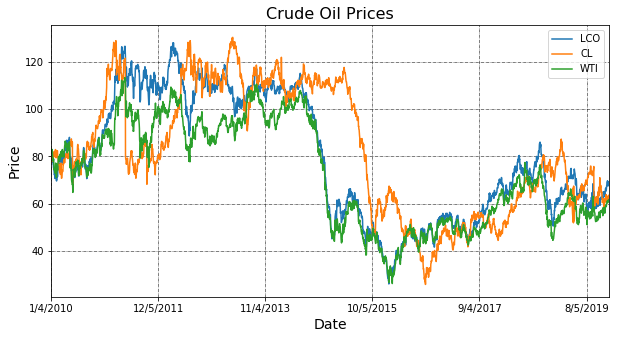

In [4]:
# Plot everything by leveraging the very powerful matplotlib package
data.plot(figsize=(10,5))

# Define the label for the title of the figure
plt.title("Crude Oil Prices", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

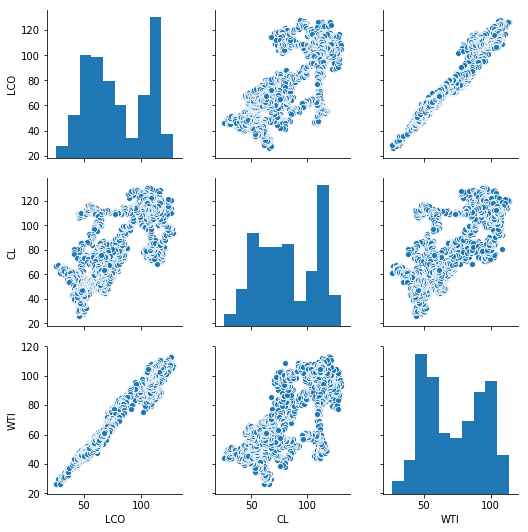

In [5]:
sns.pairplot(data)

In [6]:
data.describe()

,LCO,CL,WTI
count,2607.00000,2607.00000,2607.00000
mean,79.55725,82.50774,72.41339
std,26.16476,26.43801,21.95590
min,26.01000,25.81000,26.19000
25%,57.02000,60.26500,52.34500
50%,74.98000,79.54000,71.34000
75%,108.01000,110.31000,93.51500
max,128.14000,130.43000,113.39000


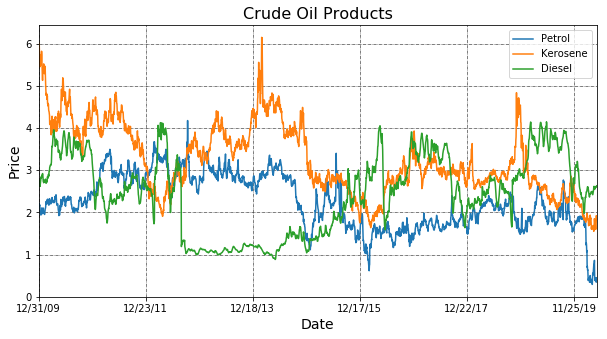

In [7]:
# Plot everything by leveraging the very powerful matplotlib package
df.plot(figsize=(10,5))

# Define the label for the title of the figure
plt.title("Crude Oil Products", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

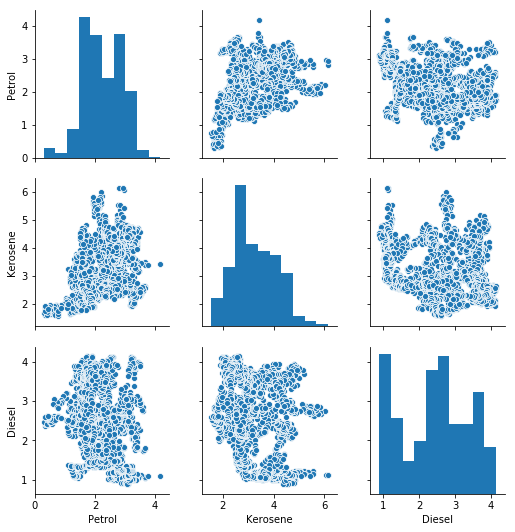

In [8]:
sns.pairplot(df)

In [9]:
df.describe()

,Petrol,Kerosene,Diesel
count,2607.00000,2607.00000,2607.00000
mean,2.24920,3.25735,2.44275
std,0.63841,0.83895,0.91995
min,0.29300,1.55200,0.88500
25%,1.74850,2.67550,1.52100
50%,2.19800,3.05200,2.51300
75%,2.81350,3.90550,3.21550
max,4.17700,6.14900,4.14700


In [10]:
V1 = data['LCO']
V2 = data['CL']
V3 = data['WTI']
X1 = df['Petrol']
X2 = df['Kerosene']
X3 = df['Diesel']


In [11]:
# calculate the Pearson's correlation and Cointegration
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(V1, X1)
corr1, _ = pearsonr(V1, X2)
corr2, _ = pearsonr(V1, X3)
corr3, _ = pearsonr(V2, X1)
corr4, _ = pearsonr(V2, X2)
corr5, _ = pearsonr(V2, X3)
corr6, _ = pearsonr(V3, X1)
corr7, _ = pearsonr(V3, X2)
corr8, _ = pearsonr(V3, X3)
print('Pearsons correlation: %.3f' % corr,corr1,corr2,corr3,corr4,corr5,corr6,corr7,corr8)


Pearsons correlation: 0.829 0.5284808722718696 -0.4358307554578534 0.6690357864684768 0.40935294284981044 -0.6012069872193723 0.7973210664304067 0.6030035668639137 -0.4344990785297812


In [12]:
data['lco_return'] = np.log(data['LCO']).diff()
data['cl_return'] =  np.log( data['CL']).diff()
data['wti_return'] =  np.log( data['WTI']).diff()
data.dropna(inplace=True)

data.loc[:,["LCO","CL","WTI","lco_return","cl_return","wti_return"]].head()

,LCO,CL,WTI,lco_return,cl_return,wti_return
Date,,,,,,
1/5/2010,79.27000,78.97000,81.74000,0.00278,0.02176,0.00270
1/6/2010,80.14000,79.77000,83.12000,0.01092,0.01008,0.01674
1/7/2010,80.57000,80.04000,82.60000,0.00535,0.00338,-0.00628
1/8/2010,80.06000,78.61000,82.74000,-0.00635,-0.01803,0.00169
1/11/2010,80.14000,79.75000,82.54000,0.00100,0.01440,-0.00242


In [13]:
data.loc[:,["lco_return","cl_return","wti_return"]].head()

,lco_return,cl_return,wti_return
Date,,,
1/5/2010,0.00278,0.02176,0.00270
1/6/2010,0.01092,0.01008,0.01674
1/7/2010,0.00535,0.00338,-0.00628
1/8/2010,-0.00635,-0.01803,0.00169
1/11/2010,0.00100,0.01440,-0.00242


In [14]:
#Now Lets Calculate the correlation between LCO, CL and WTI .
Correlation = data.loc[:,["lco_return","cl_return","wti_return"]].corr()
Correlation.style.background_gradient(cmap='coolwarm')

,lco_return,cl_return,wti_return
lco_return,1,0.00761523,0.624576
cl_return,0.00761523,1,-0.00278406
wti_return,0.624576,-0.00278406,1


In [15]:
data_returns = (data.loc[:,["lco_return","cl_return","wti_return"]])
data_returns.head().dropna()

,lco_return,cl_return,wti_return
Date,,,
1/5/2010,0.00278,0.02176,0.00270
1/6/2010,0.01092,0.01008,0.01674
1/7/2010,0.00535,0.00338,-0.00628
1/8/2010,-0.00635,-0.01803,0.00169
1/11/2010,0.00100,0.01440,-0.00242


In [16]:
std_data = data_returns.std().dropna()
print(std_data.head())

lco_return   0.01881
cl_return    0.02412
wti_return   0.02061
dtype: float64


In [17]:
var(data)

LCO          684.59462
CL           698.95775
WTI          482.02961
lco_return     0.00035
cl_return      0.00058
wti_return     0.00042
dtype: float64

In [18]:
variance = data_returns.std()* math.sqrt(252)
print(variance.head())

lco_return   0.29865
cl_return    0.38290
wti_return   0.32721
dtype: float64


In [19]:
covmat=np.cov( data_returns)

In [20]:
covmat= data_returns.cov()
covmat.style.background_gradient(cmap='coolwarm')

,lco_return,cl_return,wti_return
lco_return,0.000353945,3.45568e-06,0.000242201
cl_return,3.45568e-06,0.000581788,-1.38415e-06
wti_return,0.000242201,-1.38415e-06,0.000424859


In [21]:
df['petrol_return'] = np.log(df['Petrol']).diff()
df['kerosene_return'] =  np.log(df['Kerosene']).diff()
df['diesel_return'] =  np.log(df['Diesel']).diff()
df.dropna(inplace=True)

df.head()

,Petrol,Kerosene,Diesel,petrol_return,kerosene_return,diesel_return
Date,,,,,,
01/04/10,2.22100,5.88000,2.67700,0.01588,0.05416,0.02305
01/05/10,2.18900,5.64000,2.76800,-0.01451,-0.04167,0.03343
01/06/10,2.19800,6.01000,2.75500,0.00410,0.06354,-0.00471
01/07/10,2.15500,5.81000,2.71900,-0.01976,-0.03384,-0.01315
01/08/10,2.18300,5.75000,2.67200,0.01291,-0.01038,-0.01744


In [22]:
df_returns = df.loc[:,["petrol_return","kerosene_return","diesel_return"]]
df_returns.head()

,petrol_return,kerosene_return,diesel_return
Date,,,
01/04/10,0.01588,0.05416,0.02305
01/05/10,-0.01451,-0.04167,0.03343
01/06/10,0.00410,0.06354,-0.00471
01/07/10,-0.01976,-0.03384,-0.01315
01/08/10,0.01291,-0.01038,-0.01744


In [23]:
# Combining Portfolio retuns and Factors dataframes
df_combined = pd.merge(data.loc[:,["LCO","CL","WTI"]],df.loc[:,["petrol_return","kerosene_return","diesel_return"]], on='Date')
df_combined


,LCO,CL,WTI,petrol_return,kerosene_return,diesel_return
Date,,,,,,


In [24]:
std_df = df_returns.std().dropna()
print(std_df.head())

petrol_return     0.04334
kerosene_return   0.02802
diesel_return     0.02780
dtype: float64


In [25]:
variance = df_returns.std()* math.sqrt(252)
print(variance.head())

petrol_return     0.68805
kerosene_return   0.44473
diesel_return     0.44130
dtype: float64


In [26]:
var(df)

Petrol            0.40757
Kerosene          0.70179
Diesel            0.84629
petrol_return     0.00188
kerosene_return   0.00078
diesel_return     0.00077
dtype: float64

In [27]:
covmat_df= df_returns.cov()
covmat_df.style.background_gradient(cmap='coolwarm')

,petrol_return,kerosene_return,diesel_return
petrol_return,0.00187862,2.76691e-05,-1.61942e-05
kerosene_return,2.76691e-05,0.000784864,-1.43499e-05
diesel_return,-1.61942e-05,-1.43499e-05,0.000772793


In [28]:
#Now Lets Calculate the correlation between Petrol, Kerosene and Diesel.
Correlation = df_returns.corr()
Correlation.style.background_gradient(cmap='coolwarm')

,petrol_return,kerosene_return,diesel_return
petrol_return,1,0.0227865,-0.0134403
kerosene_return,0.0227865,1,-0.0184255
diesel_return,-0.0134403,-0.0184255,1


In [29]:
import statsmodels.api as sm
import pylab as py


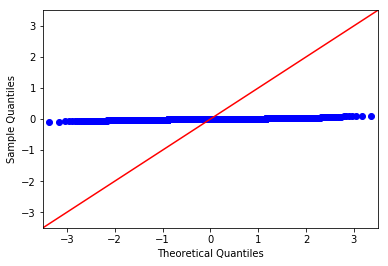

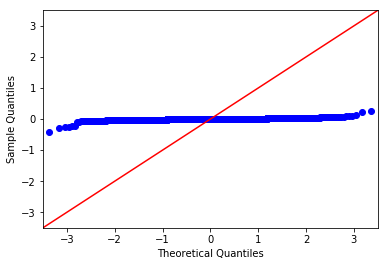

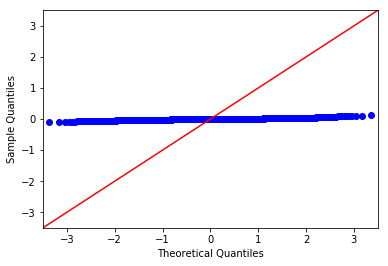

In [30]:
sm.qqplot(data['lco_return'], line = '45')
sm.qqplot(data['cl_return'], line = '45') 
sm.qqplot(data['wti_return'], line = '45') 

py.show()

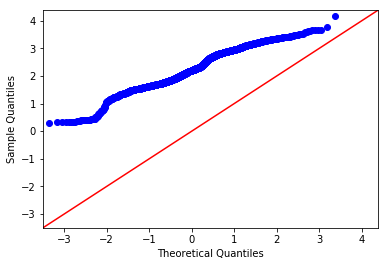

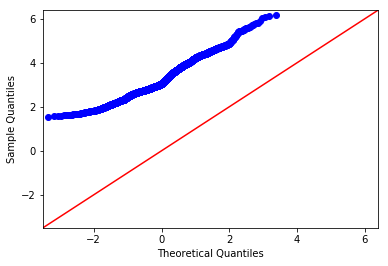

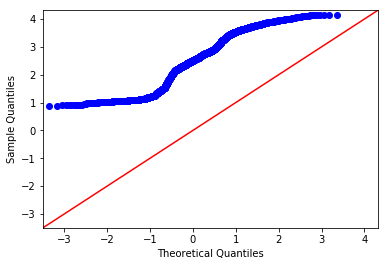

In [31]:
sm.qqplot(df['Petrol'], line = '45')
sm.qqplot(df['Kerosene'], line = '45') 
sm.qqplot(df['Diesel'], line = '45') 

py.show()

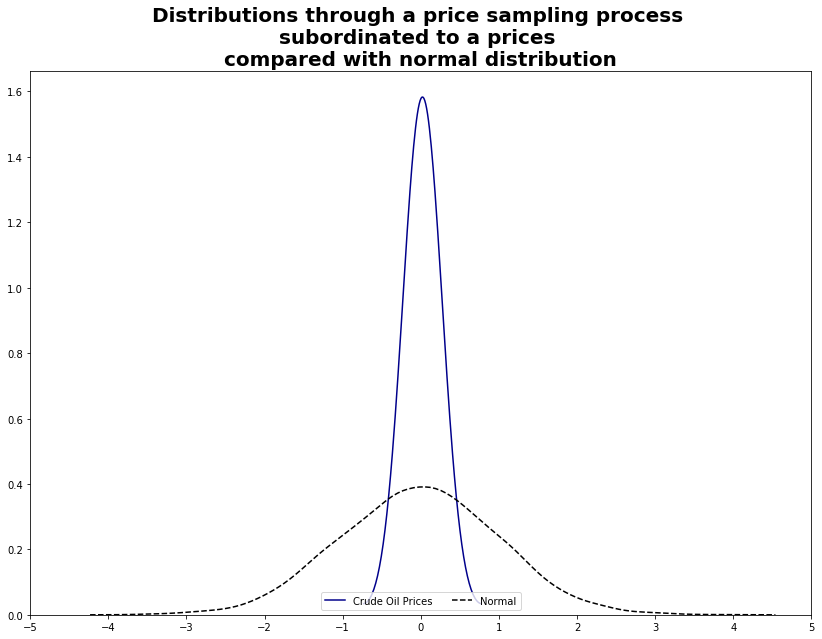

In [32]:
plt.figure(figsize=(14,10))
sb.kdeplot(std_data, label="Crude Oil Prices", bw=0.25, color='darkblue')

sb.kdeplot(np.random.normal(size=len(data_returns)), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Distributions through a price sampling process \nsubordinated to a prices \ncompared with normal distribution',
          loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.xlim(-5, 5)
plt.show()

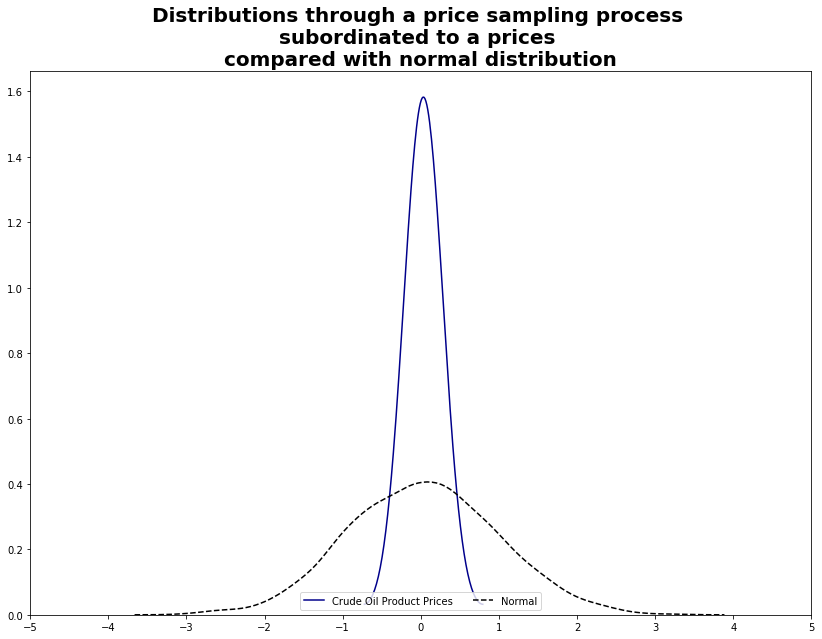

In [33]:
plt.figure(figsize=(14,10))
sb.kdeplot(std_df, label="Crude Oil Product Prices", bw=0.25, color='darkblue')

sb.kdeplot(np.random.normal(size=len(df_returns)), label="Normal", color='black', linestyle="--")

plt.xticks(range(-5, 6))
plt.legend(loc=8, ncol=5)
plt.title('Distributions through a price sampling process \nsubordinated to a prices \ncompared with normal distribution',
          loc='center', fontsize=20, fontweight="bold", fontname="Times New Roman")
plt.xlim(-5, 5)
plt.show()

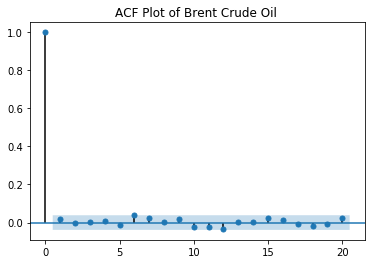

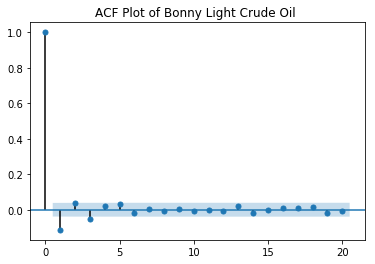

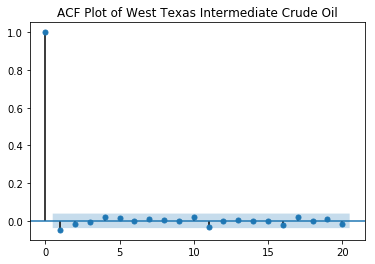

In [34]:
#From Correlation map it shows that the highest correlation between the portfolio and the fama french factors is Mkt-RF
#Therefore we draw ACF and PACF
acf = plot_acf(data["lco_return"], lags = 20)
plt.title("ACF Plot of Brent Crude Oil ")

acf = plot_acf(data["cl_return"], lags = 20)
plt.title("ACF Plot of Bonny Light Crude Oil ")

acf = plot_acf(data["wti_return"], lags = 20)
plt.title("ACF Plot of West Texas Intermediate Crude Oil")

acf.show()

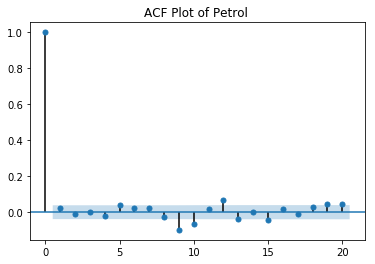

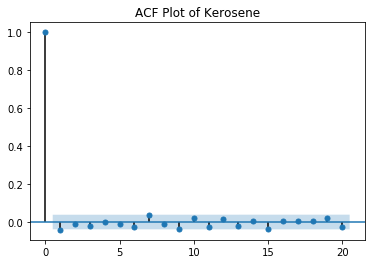

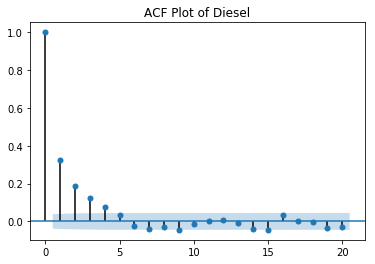

In [35]:
#From Correlation map it shows that the highest correlation between the portfolio and the fama french factors is Mkt-RF
#Therefore we draw ACF and PACF
acf = plot_acf(df["petrol_return"], lags = 20)
plt.title("ACF Plot of Petrol ")

acf = plot_acf(df["kerosene_return"], lags = 20)
plt.title("ACF Plot of Kerosene")

acf = plot_acf(df["diesel_return"], lags = 20)
plt.title("ACF Plot of Diesel")

acf.show()

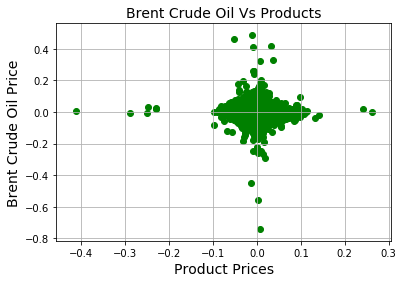

In [36]:
plt.scatter(data_returns, df_returns, color='green')
plt.title('Brent Crude Oil Vs Products', fontsize=14)
plt.xlabel('Product Prices', fontsize=14)
plt.ylabel('Brent Crude Oil Price', fontsize=14)
plt.grid(True)
plt.show()


In [37]:
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error

X1 = data_returns # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y1 = data.loc[:,["LCO"]]
 
# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X1, Y1)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 [79.5600432]
Coefficients: 
 [[39.02707207 15.36754188 -7.6858886 ]]


In [38]:
X0 = data_returns # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y0 = data.loc[:,["LCO"]]

# with statsmodels
X0_train, X0_test, y0_train, y0_test = train_test_split(X0, Y0, test_size = 0.2,random_state = 465)
X_train = sm.add_constant(X0_train)
results_ = sm.OLS(y0_train, X0_train).fit()
results_.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    LCO   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.05085
Date:                Sun, 17 May 2020   Prob (F-statistic):                       0.985
Time:                        17:26:00   Log-Likelihood:                         -12181.
No. Observations:                2084   AIC:                                  2.437e+04
Df Residuals:                    2081   BIC:                                  2.439e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lco_return    45.4532    124.283      0.366      0.715    -198.279     289.186
cl_return      7.6499     76.585      0.100      0.920    -142.541     157.841
wti_return   -33.1880    112.182     -0.296      0.767    -253.188     186.812
==============================================================================
Omnibus:                    42857.045   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.322
Skew:                           0.088   Prob(JB):                     2.08e-36
Kurtosis:                       1.636   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
X0 = data_returns # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_1 = data.loc[:,["CL"]]

# with statsmodels
X0_train, X0_test, y_1_train, y_1_test = train_test_split(X0, Y_1, test_size = 0.2,random_state = 465)
X_train = sm.add_constant(X0_train)
results_ = sm.OLS(y_1_train, X0_train).fit()
results_.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     CL   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.1943
Date:                Sun, 17 May 2020   Prob (F-statistic):                       0.900
Time:                        17:26:01   Log-Likelihood:                         -12266.
No. Observations:                2084   AIC:                                  2.454e+04
Df Residuals:                    2081   BIC:                                  2.455e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lco_return     8.6508    129.444      0.067      0.947    -245.202     262.503
cl_return     34.8415     79.765      0.437      0.662    -121.585     191.268
wti_return   -62.1649    116.839     -0.532      0.595    -291.299     166.970
==============================================================================
Omnibus:                     6525.244   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.436
Skew:                          -0.037   Prob(JB):                     5.85e-33
Kurtosis:                       1.695   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
X0 = data_returns # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y_2 = data.loc[:,["WTI"]]

# with statsmodels
X0_train, X0_test, y_2_train, y_2_test = train_test_split(X0, Y_2, test_size = 0.2,random_state = 465)
X_train = sm.add_constant(X0_train)
results_ = sm.OLS(y_2_train, X0_train).fit()
results_.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    WTI   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.01642
Date:                Sun, 17 May 2020   Prob (F-statistic):                       0.997
Time:                        17:26:01   Log-Likelihood:                         -11971.
No. Observations:                2084   AIC:                                  2.395e+04
Df Residuals:                    2081   BIC:                                  2.396e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lco_return    15.7463    112.351      0.140      0.889    -204.585     236.077
cl_return      9.7892     69.232      0.141      0.888    -125.981     145.560
wti_return    -0.9028    101.411     -0.009      0.993    -199.780     197.974
==============================================================================
Omnibus:                    37075.948   Durbin-Watson:                   0.164
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.114
Skew:                           0.032   Prob(JB):                     3.80e-36
Kurtosis:                       1.631   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
# with statsmodels
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = 0.2,random_state = 465)

lin_reg_mod = linear_model.LinearRegression()
lin_reg_mod.fit(X0_train, y0_train)

pred = lin_reg_mod.predict(X0_test)

test_set_rmse = (np.sqrt(mean_squared_error(y1_test, pred)))

test_set_rmse


26.50608727758135

In [42]:
from sklearn.metrics import r2_score
test_set_r2 = r2_score(y1_test, pred)
test_set_r2

-0.0009528609112967601

In [43]:
print('Training Data Count: {}'.format(X1_train.shape[0]))
print('Testing Data Count: {}'.format(X1_test.shape[0]))

Training Data Count: 2084
Testing Data Count: 522


In [44]:
print('Training Data Count: {}'.format(y1_train.shape[0]))
print('Testing Data Count: {}'.format(y1_test.shape[0]))

Training Data Count: 2084
Testing Data Count: 522


In [45]:
X_train = sm.add_constant(X1_train)
results_ = sm.OLS(y1_train, X1_train).fit()
results_.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    LCO   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                            0.05085
Date:                Sun, 17 May 2020   Prob (F-statistic):                       0.985
Time:                        17:26:01   Log-Likelihood:                         -12181.
No. Observations:                2084   AIC:                                  2.437e+04
Df Residuals:                    2081   BIC:                                  2.439e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
lco_return    45.4532    124.283      0.366      0.715    -198.279     289.186
cl_return      7.6499     76.585      0.100      0.920    -142.541     157.841
wti_return   -33.1880    112.182     -0.296      0.767    -253.188     186.812
==============================================================================
Omnibus:                    42857.045   Durbin-Watson:                   0.191
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.322
Skew:                           0.088   Prob(JB):                     2.08e-36
Kurtosis:                       1.636   Cond. No.                         2.06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
#Read data from file 'filename.csv'
#(in the same directory that your python process is based)
#Control delimiters, rows, column names with read_csv

data_df = pd.read_csv('data_df.csv', header=0)
# Preview the first 5 lines of the loaded data
data_df = data_df.set_index("Date")
data_df.head().dropna()

,LCO,CL,WTI,Petrol,Kerosene,Diesel
Date,,,,,,
01/04/10,79.05000,77.27000,81.52000,2.18600,5.57000,2.61600
01/05/10,79.27000,78.97000,81.74000,2.22100,5.88000,2.67700
01/06/10,80.14000,79.77000,83.12000,2.18900,5.64000,2.76800
01/07/10,80.57000,80.04000,82.60000,2.19800,6.01000,2.75500
01/08/10,80.06000,78.61000,82.74000,2.15500,5.81000,2.71900


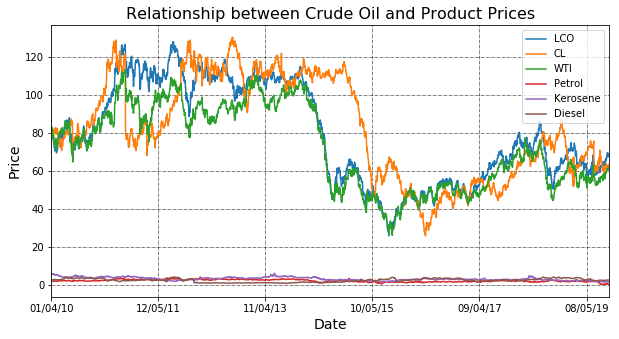

In [47]:
# Plot everything by leveraging the very powerful matplotlib package
data_df.plot(figsize=(10,5))

# Define the label for the title of the figure
plt.title("Relationship between Crude Oil and Product Prices", fontsize=16)
# Define the labels for x-axis and y-axis
plt.ylabel('Price', fontsize=14)
plt.xlabel('Date', fontsize=14)
# Plot the grid lines
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

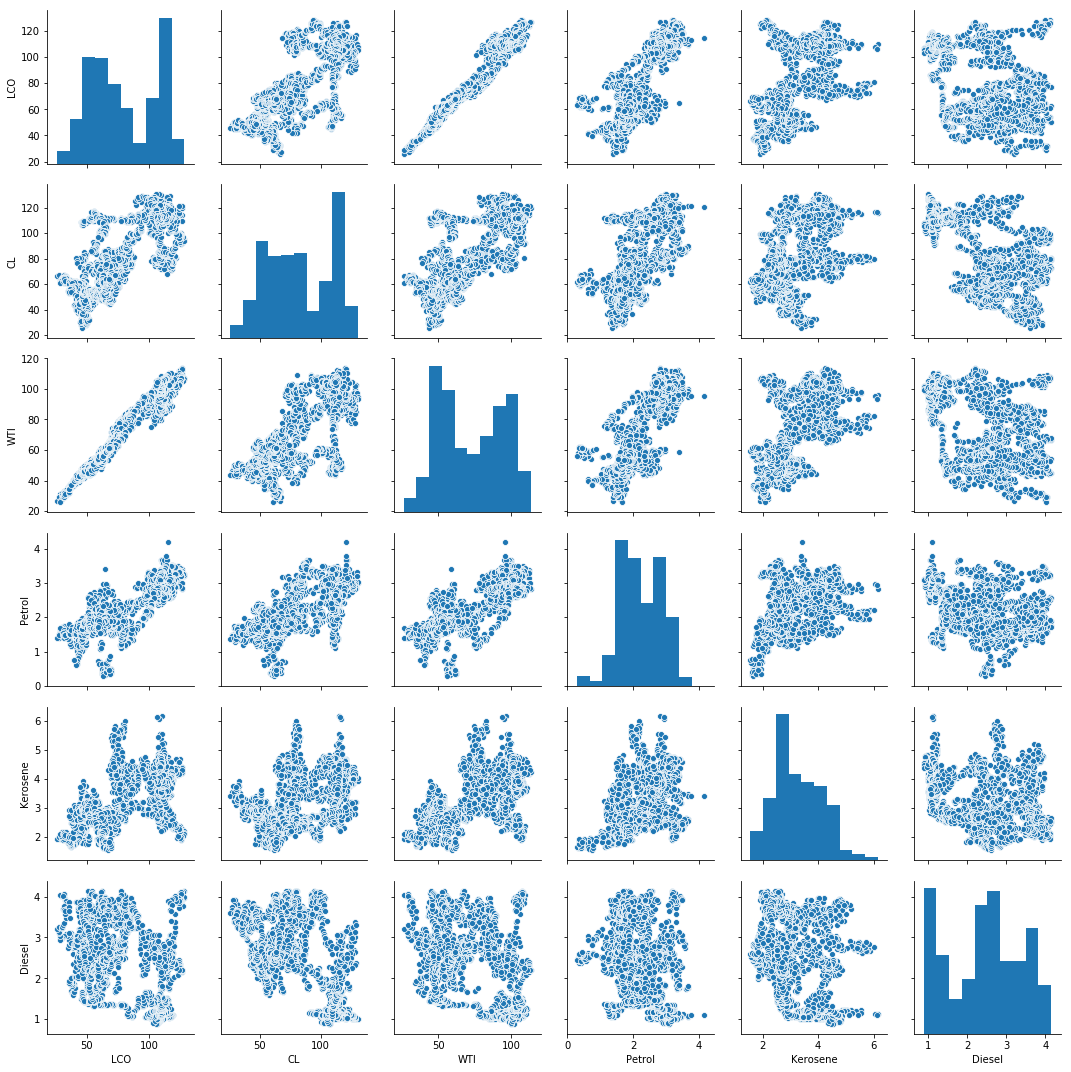

In [48]:
sns.pairplot(data_df)

In [49]:
data_df.describe()

,LCO,CL,WTI,Petrol,Kerosene,Diesel
count,2607.00000,2607.00000,2607.00000,2607.00000,2607.00000,2607.00000
mean,79.55725,82.50774,72.41339,2.24920,3.25735,2.44275
std,26.16476,26.43801,21.95590,0.63841,0.83895,0.91995
min,26.01000,25.81000,26.19000,0.29300,1.55200,0.88500
25%,57.02000,60.26500,52.34500,1.74850,2.67550,1.52100
50%,74.98000,79.54000,71.34000,2.19800,3.05200,2.51300
75%,108.01000,110.31000,93.51500,2.81350,3.90550,3.21550
max,128.14000,130.43000,113.39000,4.17700,6.14900,4.14700


In [50]:
data_df['petrol_return'] = data_df['Petrol'].pct_change()
data_df['kerosene_return'] = data_df['Kerosene'].pct_change()
data_df['diesel_return'] = data_df['Diesel'].pct_change()
data_df.dropna(inplace=True)
data_df.head()

,LCO,CL,WTI,Petrol,Kerosene,Diesel,petrol_return,kerosene_return,diesel_return
Date,,,,,,,,,
01/05/10,79.27000,78.97000,81.74000,2.22100,5.88000,2.67700,0.01601,0.05566,0.02332
01/06/10,80.14000,79.77000,83.12000,2.18900,5.64000,2.76800,-0.01441,-0.04082,0.03399
01/07/10,80.57000,80.04000,82.60000,2.19800,6.01000,2.75500,0.00411,0.06560,-0.00470
01/08/10,80.06000,78.61000,82.74000,2.15500,5.81000,2.71900,-0.01956,-0.03328,-0.01307
01/11/10,80.14000,79.75000,82.54000,2.18300,5.75000,2.67200,0.01299,-0.01033,-0.01729


In [51]:
data_df_rets = data_df.loc[:,["petrol_return","kerosene_return","diesel_return"]]
data_df_rets.head()

,petrol_return,kerosene_return,diesel_return
Date,,,
01/05/10,0.01601,0.05566,0.02332
01/06/10,-0.01441,-0.04082,0.03399
01/07/10,0.00411,0.06560,-0.00470
01/08/10,-0.01956,-0.03328,-0.01307
01/11/10,0.01299,-0.01033,-0.01729


In [52]:
X = data_df_rets # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y = data_df.loc[:,["LCO"]]

# with sklearn
regr = linear_model.LinearRegression()
regr.fit(X, Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)


Intercept: 
 [79.5636714]
Coefficients: 
 [[ -6.05305634   1.76097    -10.92833982]]


In [53]:
# with statsmodels
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2,random_state = 465)

lin_reg_mod = linear_model.LinearRegression()
lin_reg_mod.fit(X_train, y_train)

pred = lin_reg_mod.predict(X_test)

test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_rmse



26.531458395591642

In [54]:
from sklearn.metrics import r2_score
test_set_r2 = r2_score(y_test, pred)
test_set_r2

-0.0028699637137166167

In [55]:
print('Training Data Count: {}'.format(X_train.shape[0]))
print('Testing Data Count: {}'.format(X_test.shape[0]))

Training Data Count: 2084
Testing Data Count: 522


In [56]:
X_train = sm.add_constant(X_train)
results = sm.OLS(y_train, X_train).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    LCO   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.5103
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.675
Time:                        17:26:12   Log-Likelihood:                -9752.6
No. Observations:                2084   AIC:                         1.951e+04
Df Residuals:                    2080   BIC:                         1.954e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              79.4580      0.572    138.921      0.000      78.336      80.580
petrol_return      -9.8551     12.933     -0.762      0.446     -35.218      15.508
kerosene_return    -1.5526     20.467     -0.076      0.940     -41.690      38.585
diesel_return     -19.6387     19.945     -0.985      0.325     -58.752      19.475
==============================================================================
Omnibus:                    44758.438   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.046
Skew:                           0.088   Prob(JB):                     2.39e-36
Kurtosis:                       1.637   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [57]:
X = data_df_rets # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y1 = data_df.loc[:,["CL"]]

# with statsmodels
X_train, X_test, y1_train, y1_test = train_test_split(X, Y1, test_size = 0.2,random_state = 465)
X_train = sm.add_constant(X_train)
results1 = sm.OLS(y1_train, X_train).fit()
results1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     CL   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.198
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.309
Time:                        17:26:12   Log-Likelihood:                -9799.9
No. Observations:                2084   AIC:                         1.961e+04
Df Residuals:                    2080   BIC:                         1.963e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              82.9292      0.585    141.740      0.000      81.782      84.077
petrol_return      -9.5342     13.230     -0.721      0.471     -35.479      16.411
kerosene_return    -5.7302     20.936     -0.274      0.784     -46.788      35.328
diesel_return     -35.6696     20.402     -1.748      0.081     -75.680       4.341
==============================================================================
Omnibus:                     7030.621   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              149.237
Skew:                          -0.040   Prob(JB):                     3.92e-33
Kurtosis:                       1.691   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
X = data_df_rets # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y2 = data_df.loc[:,["WTI"]]

# with statsmodels
X_train, X_test, y2_train, y2_test = train_test_split(X, Y2, test_size = 0.2,random_state = 465)
X_train = sm.add_constant(X_train)
results2 = sm.OLS(y2_train, X_train).fit()
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    WTI   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.6052
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.612
Time:                        17:26:12   Log-Likelihood:                -9388.9
No. Observations:                2084   AIC:                         1.879e+04
Df Residuals:                    2080   BIC:                         1.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              72.3550      0.480    150.626      0.000      71.413      73.297
petrol_return     -11.3537     10.862     -1.045      0.296     -32.655       9.947
kerosene_return    -0.7546     17.189     -0.044      0.965     -34.464      32.955
diesel_return     -14.5029     16.750     -0.866      0.387     -47.352      18.347
==============================================================================
Omnibus:                    37755.726   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.923
Skew:                           0.031   Prob(JB):                     4.19e-36
Kurtosis:                       1.632   Cond. No.                         36.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
X6 = data_df.loc[:,["LCO","CL","WTI" ]] # here we have 2 variables for multiple regression. If you just want to use one variable for simple linear regression, then use X = df['Interest_Rate'] for example.Alternatively, you may add additional variables within the brackets
Y6 = data_df.loc[:,["petrol_return"]]

# with statsmodels
X6_train, X6_test, y6_train, y6_test = train_test_split(X6, Y6, test_size = 0.2,random_state = 465)
X6_train = sm.add_constant(X6_train)
results6 = sm.OLS(y6_train, X6_train).fit()
results6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          petrol_return   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8207
Date:                Sun, 17 May 2020   Prob (F-statistic):              0.482
Time:                        17:26:13   Log-Likelihood:                 3543.0
No. Observations:                2084   AIC:                            -7078.
Df Residuals:                    2080   BIC:                            -7055.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0054      0.004      1.499      0.134      -0.002       0.013
LCO            0.0002      0.000      1.180      0.238      -0.000       0.001
CL         -5.123e-06   5.29e-05     -0.097      0.923      -0.000    9.86e-05
WTI           -0.0003      0.000     -1.360      0.174      -0.001       0.000
==============================================================================
Omnibus:                     1494.276   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           134618.591
Skew:                           2.617   Prob(JB):                         0.00
Kurtosis:                      42.024   Cond. No.                         528.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

                             ARIMA Model Results                              
Dep. Variable:                  D.LCO   No. Observations:                 2605
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4423.692
Method:                       css-mle   S.D. of innovations              1.322
Date:                Sun, 17 May 2020   AIC                           8861.385
Time:                        17:28:52   BIC                           8902.441
Sample:                    01-06-2010   HQIC                          8876.259
                         - 12-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0044      0.026     -0.171      0.864      -0.055       0.046
ar.L1.D.LCO     0.0151      0.020      0.772      0.440      -0.023       0.054
ar.L2.D.LCO     0.0029      0.020      0.147    

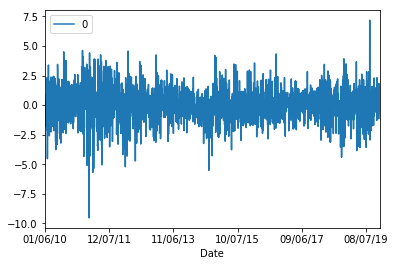

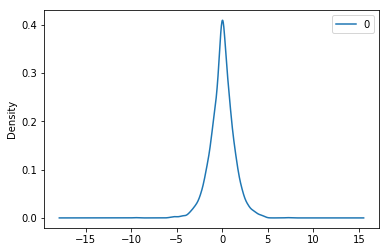

               0
count 2605.00000
mean    -0.00000
std      1.32235
min     -9.54253
25%     -0.72066
50%      0.01801
75%      0.72929
max      7.17819


In [61]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
# fit model
model = ARIMA(data_df.loc[:,["LCO"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:                   D.CL   No. Observations:                 2605
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -5265.679
Method:                       css-mle   S.D. of innovations              1.827
Date:                Sun, 17 May 2020   AIC                          10545.359
Time:                        17:30:00   BIC                          10586.415
Sample:                    01-06-2010   HQIC                         10560.233
                         - 12-31-2019                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0059      0.033     -0.176      0.860      -0.071       0.060
ar.L1.D.CL    -0.0737      0.020     -3.763      0.000      -0.112      -0.035
ar.L2.D.CL     0.0027      0.020      0.135      0.8

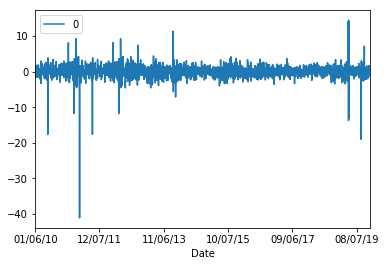

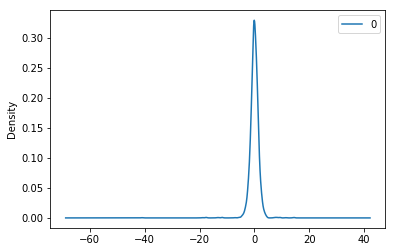

               0
count 2605.00000
mean     0.00002
std      1.82691
min    -41.07804
25%     -0.72268
50%      0.02871
75%      0.84068
max     14.41800


In [62]:
# fit model
model = ARIMA(data_df.loc[:,["CL"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:                  D.WTI   No. Observations:                 2605
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -4452.970
Method:                       css-mle   S.D. of innovations              1.337
Date:                Sun, 17 May 2020   AIC                           8919.941
Time:                        17:30:48   BIC                           8960.997
Sample:                    01-06-2010   HQIC                          8934.815
                         - 12-31-2019                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0079      0.025     -0.312      0.755      -0.058       0.042
ar.L1.D.WTI    -0.0347      0.020     -1.771      0.077      -0.073       0.004
ar.L2.D.WTI    -0.0077      0.020     -0.395    

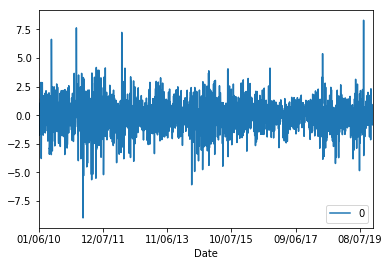

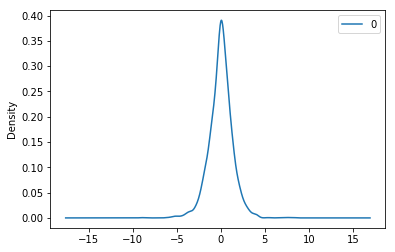

               0
count 2605.00000
mean     0.00003
std      1.33729
min     -8.98618
25%     -0.71942
50%      0.02971
75%      0.72471
max      8.30626


In [63]:
# fit model
model = ARIMA(data_df.loc[:,["WTI"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.Petrol   No. Observations:                 2605
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2959.326
Method:                       css-mle   S.D. of innovations              0.078
Date:                Sun, 17 May 2020   AIC                          -5904.653
Time:                        17:31:18   BIC                          -5863.597
Sample:                    01-06-2010   HQIC                         -5889.779
                         - 12-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0007      0.001     -0.467      0.641      -0.004       0.002
ar.L1.D.Petrol    -0.0040      0.020     -0.202      0.840      -0.042       0.034
ar.L2.D.Petrol    -0.0372      0.020

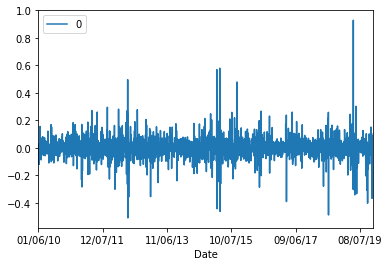

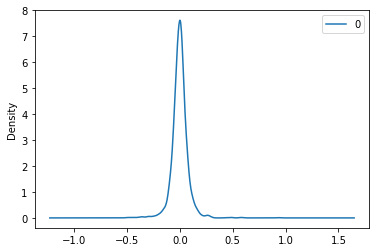

               0
count 2605.00000
mean    -0.00000
std      0.07771
min     -0.50965
25%     -0.03468
50%     -0.00003
75%      0.03409
max      0.92889


In [64]:
# fit model
model = ARIMA(data_df.loc[:,["Petrol"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:             D.Kerosene   No. Observations:                 2605
Model:                 ARIMA(5, 1, 0)   Log Likelihood                2410.149
Method:                       css-mle   S.D. of innovations              0.096
Date:                Sun, 17 May 2020   AIC                          -4806.298
Time:                        17:31:48   BIC                          -4765.242
Sample:                    01-06-2010   HQIC                         -4791.424
                         - 12-31-2019                                         
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0016      0.002     -0.922      0.356      -0.005       0.002
ar.L1.D.Kerosene    -0.0515      0.020     -2.624      0.009      -0.090      -0.013
ar.L2.D.Kerosene    -0.0192 

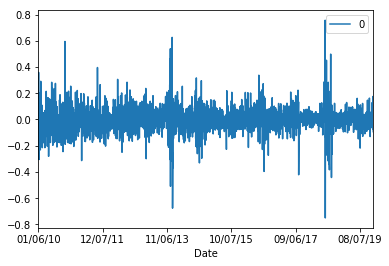

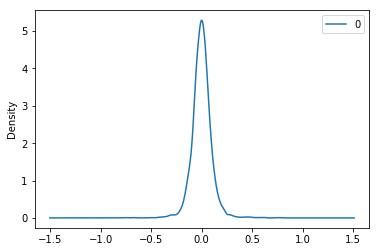

               0
count 2605.00000
mean    -0.00001
std      0.09595
min     -0.75044
25%     -0.05133
50%     -0.00006
75%      0.04795
max      0.75662


In [65]:
# fit model
model = ARIMA(data_df.loc[:,["Kerosene"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.Diesel   No. Observations:                 2605
Model:                 ARIMA(5, 1, 0)   Log Likelihood                3637.012
Method:                       css-mle   S.D. of innovations              0.060
Date:                Sun, 17 May 2020   AIC                          -7260.024
Time:                        17:32:12   BIC                          -7218.968
Sample:                    01-06-2010   HQIC                         -7245.150
                         - 12-31-2019                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.793e-05      0.002      0.008      0.994      -0.004       0.004
ar.L1.D.Diesel     0.3603      0.020     18.386      0.000       0.322       0.399
ar.L2.D.Diesel     0.0363      0.021

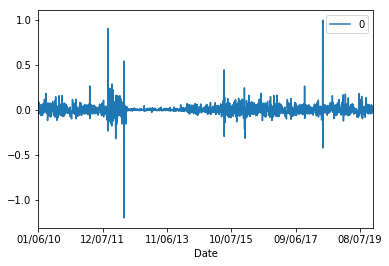

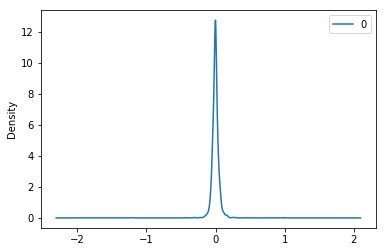

               0
count 2605.00000
mean    -0.00002
std      0.05991
min     -1.20507
25%     -0.02376
50%     -0.00180
75%      0.01813
max      0.99794


In [66]:
# fit model
model = ARIMA(data_df.loc[:,["Diesel"]], order=(5,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())